### Datasets

### https://drive.google.com/drive/folders/1rCr2-FWLjTM69xxbYplYEKKmiOrMbMFt

###  Imports

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [83]:
data=pd.read_csv('BigMartSalesData.csv')

In [84]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Cleaning

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [86]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
data=data.dropna()

In [88]:
data.duplicated().sum()

0

### Preprocessing

In [89]:
label_encoder={}
categorical_cols=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for col in categorical_cols:
    le=LabelEncoder()
    data.loc[:,col]=le.fit_transform(data[col])
    label_encoder[col]=le

### Splitting

In [90]:
X=data.drop(columns='Item_Outlet_Sales')
y=data['Item_Outlet_Sales']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model

In [93]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
y_pred_lr=lr.predict(X_test)
y_pred_rf=rf.predict(X_test)

In [96]:
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)

print("Mean Squared Error for Linear Regression: ",mse_lr)
print("R2 Score for Linear Regression: ",r2_lr)

mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("\nMean Squared Error for Random Forest Regressor: ",mse_rf)
print("R2 Score for Random Forest Regressor: ",r2_rf)

Mean Squared Error for Linear Regression:  1084627.9400079562
R2 Score for Linear Regression:  0.49807972963304903

Mean Squared Error for Random Forest Regressor:  1221514.7738265423
R2 Score for Random Forest Regressor:  0.43473425040872027


### Visualization

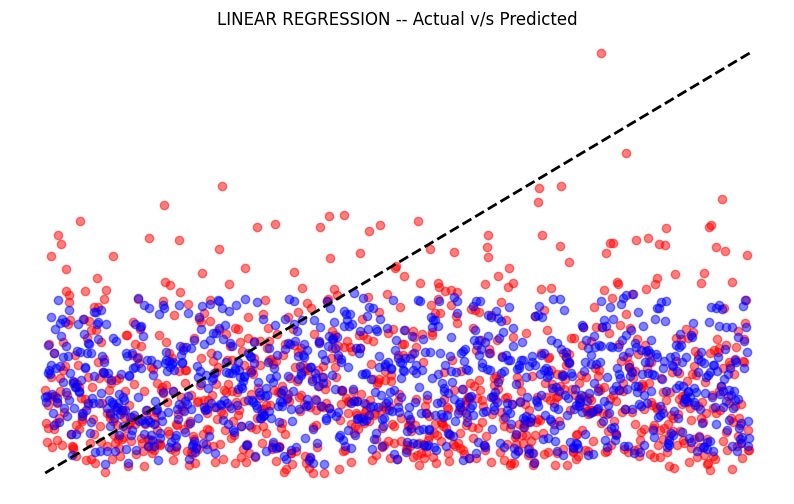

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='red',label='Actual',alpha=0.5)
plt.scatter(range(len(y_pred_lr)),y_pred_lr,color='blue',label='Predicted',alpha=0.5)
plt.plot([0,len(y_test)],[min(y_test.min(),y_pred_lr.min()),max(y_test.max(),y_pred_lr.max())],'k--',lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR REGRESSION -- Actual v/s Predicted")
plt.axis('off')
plt.show()

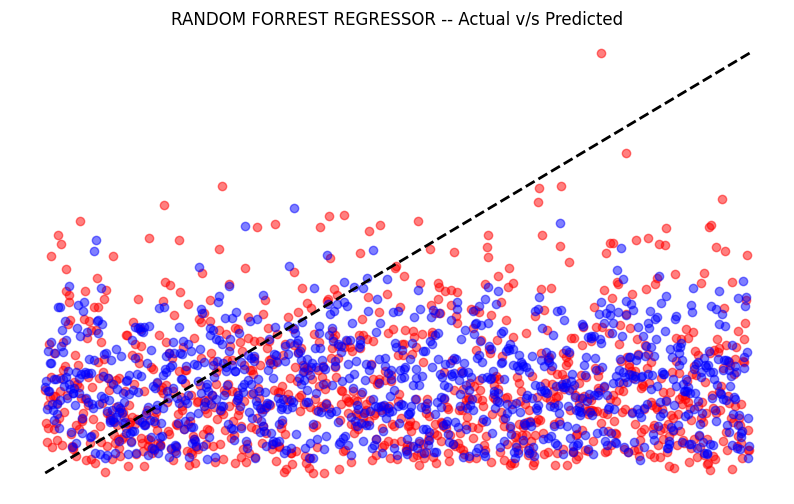

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='red',label='Actual',alpha=0.5)
plt.scatter(range(len(y_pred_rf)),y_pred_rf,color='blue',label='Predicted',alpha=0.5)
plt.plot([0,len(y_test)],[min(y_test.min(),y_pred_rf.min()),max(y_test.max(),y_pred_rf.max())],'k--',lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RANDOM FORREST REGRESSOR -- Actual v/s Predicted")
plt.axis('off')
plt.show()

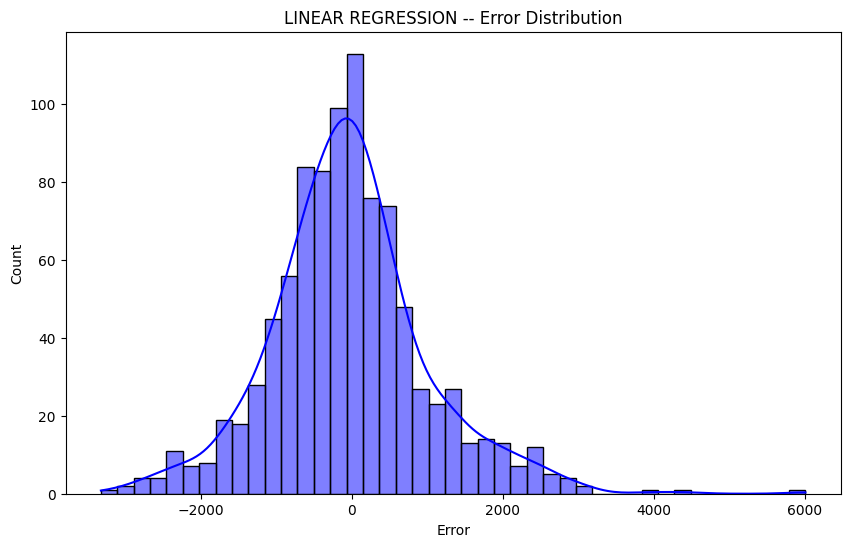

In [99]:
errors = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue')
plt.xlabel('Error')
plt.title('LINEAR REGRESSION -- Error Distribution')
plt.show()


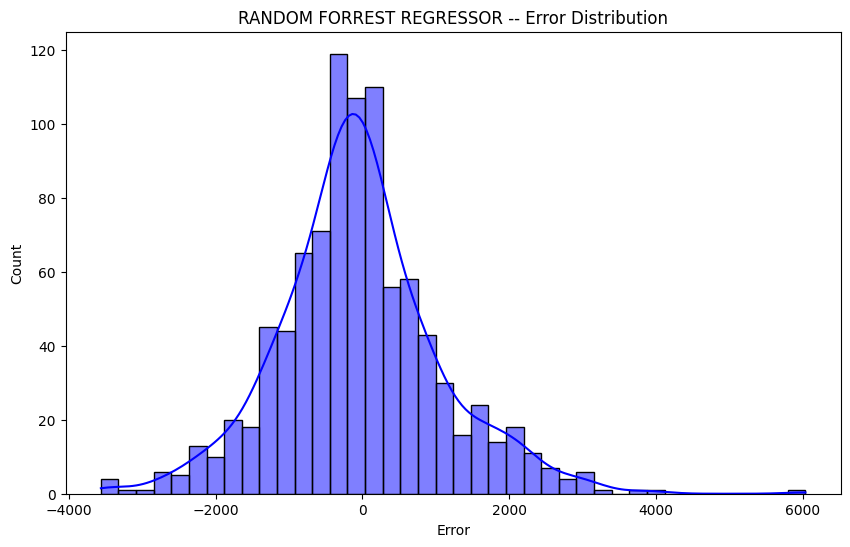

In [100]:
errors = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue')
plt.xlabel('Error')
plt.title('RANDOM FORREST REGRESSOR -- Error Distribution')
plt.show()
